In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
!pip install pmdarima

     |████████████████████████████████| 1.4 MB 14.1 MB/s 
     |████████████████████████████████| 9.8 MB 56.2 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [4]:
import statsmodels as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima import auto_arima
import pmdarima as pm

# Data
 

In [5]:
#Data 불러오기. KMSK data를 다운 받음. BI에서 crosstap기능 이용
df = pd.read_csv('https://raw.githubusercontent.com/parandeung/BCWoo/main/KMSK.csv')
df.tail(5)

,Week,Vsl_Voy,EST,JBT,OBT,Total,Year,Week.1,Unnamed: 8
158,2021-51,KQD 2111S,928,111,882,1921,2021,51,2021-12-13
159,2021-52,KNB 2111S,734,1,1112,1847,2021,52,2021-12-20
160,2021-53,KTJ 2111S,914,55,899,1868,2021,53,2021-12-27
161,2022-01,KSZ 2201S,682,60,1104,1846,2022,1,2022-01-01
162,2022-02,KQD 2201S,937,88,874,1899,2022,2,2022-01-03


In [6]:
# Data Processing
df['TEU']=df['Total']
df['Date'] = pd.to_datetime(df['Unnamed: 8'])
df.tail(2)

,Week,Vsl_Voy,EST,JBT,OBT,Total,Year,Week.1,Unnamed: 8,TEU,Date
161,2022-01,KSZ 2201S,682,60,1104,1846,2022,1,2022-01-01,1846,2022-01-01
162,2022-02,KQD 2201S,937,88,874,1899,2022,2,2022-01-03,1899,2022-01-03


In [7]:
df.dtypes

Week                  object
Vsl_Voy               object
EST                    int64
JBT                    int64
OBT                    int64
Total                  int64
Year                   int64
Week.1                 int64
Unnamed: 8            object
TEU                    int64
Date          datetime64[ns]
dtype: object

In [8]:
df_t=df[:156]
df_t.tail()

,Week,Vsl_Voy,EST,JBT,OBT,Total,Year,Week.1,Unnamed: 8,TEU,Date
151,2021-44,KNB 2109S,864,167,814,1845,2021,44,2021-10-25,1845,2021-10-25
152,2021-45,KTJ 2109S,902,132,895,1929,2021,45,2021-11-01,1929,2021-11-01
153,2021-46,KSZ 2110S,827,103,802,1732,2021,46,2021-11-08,1732,2021-11-08
154,2021-47,KQD 2110S,962,136,802,1900,2021,47,2021-11-15,1900,2021-11-15
155,2021-48,KNB 2110S,817,146,962,1925,2021,48,2021-11-22,1925,2021-11-22


In [9]:
df_t=df_t[['Date','TEU']]
df_t.set_index("Date", inplace=True)
df_t.head(2)

,TEU
Date,
2018-10-01,1344
2018-10-08,1811


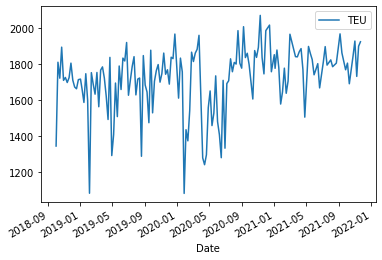

In [10]:
fig = df_t.plot()

In [11]:
#plt.figure(figsize=(10, 6))
#plt.plot(df_t['Date'], df_t['TEU'])

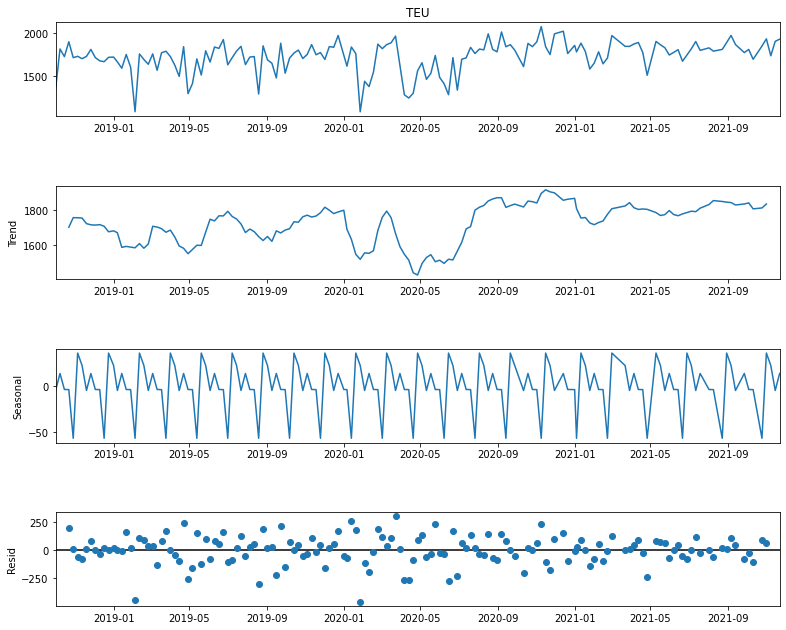

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose
res = seasonal_decompose(df_t['TEU'],model='additive', period=7)
fig=res.plot()
fig.set_size_inches(12,10)
plt.show()

In [13]:
!pip install --upgrade openpyxl

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


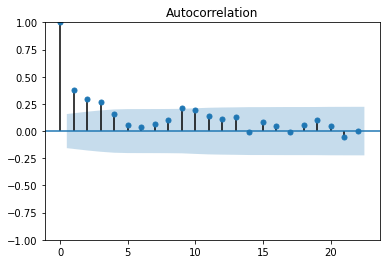

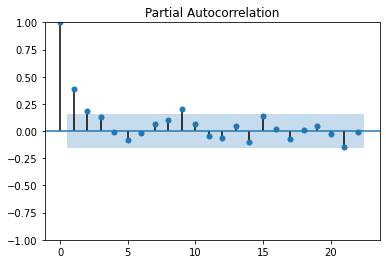

<Figure size 720x432 with 0 Axes>

In [14]:
plot_acf(df_t['TEU'])
plot_pacf(df_t['TEU'])
plt.figure(figsize=(10, 6))
plt.show()

# 차분

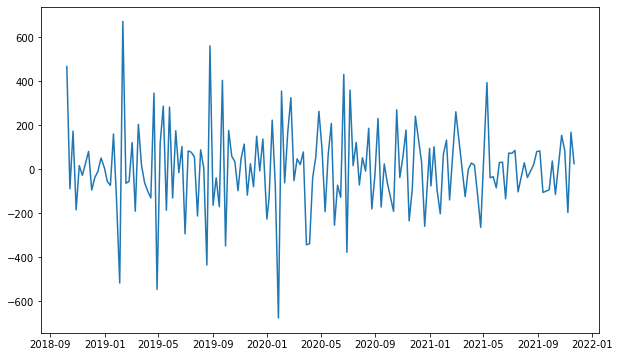

In [15]:
#1차 차분
diff_1=df_t['TEU'].diff().dropna()
plt.figure(figsize=(10, 6))
plt.plot(diff_1)
plt.show()

# ACF, PACF

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


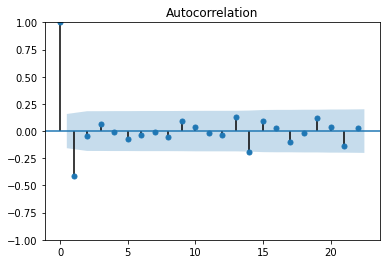

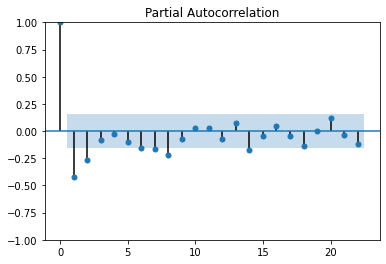

In [16]:
plot_acf(diff_1)
plot_pacf(diff_1)
plt.show()

# ARIMA(p,d,q)판단
 

https://www.statsmodels.org/devel/generated/statsmodels.tsa.arima.model.ARIMA.html

라이브러리 이름이 arima_model이었는데, arima.model로 바뀌었고, 그러면서 함수들이나 파라미터가 다 조금씩 바뀌어서 새로 해야 하는 상황임

In [17]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df_t['TEU'], order = (2,1,1))
model_fit = model.fit()
model_fit.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:595: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:595: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:595: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    TEU   No. Observations:                  156
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -1010.082
Date:                Mon, 07 Feb 2022   AIC                           2028.164
Time:                        13:43:57   BIC                           2040.338
Sample:                             0   HQIC                          2033.109
                                - 156                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2792      0.077      3.641      0.000       0.129       0.430
ar.L2          0.1371      0.095      1.444      0.149      -0.049       0.323
ma.L1         -0.9560      0.038    -25.188      0.000      -1.030      -0.882
sigma2      2.638e+04   2249.781     11.727      0.000     2.2e+04    3.08e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                68.48
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.43   Skew:                            -1.03
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [18]:
import itertools
#Parameter search
print('Examples of parameter combination for Seasonal ARIMA...')
p = range(0,3)
d = range(1,2)
q = range(0,3)
pdq = list(itertools. product(p,d,q))

aic = []
for i in pdq:
    model = ARIMA(df_t.values, order = (i))
    model_fit = model.fit()
    print(f'ARIMA:{i} >> AIC : {round(model_fit.aic,2)}')
    aic.append(round(model_fit.aic,2))

Examples of parameter combination for Seasonal ARIMA...
ARIMA:(0, 1, 0) >> AIC : 2079.4
ARIMA:(0, 1, 1) >> AIC : 2032.55
ARIMA:(0, 1, 2) >> AIC : 2030.41
ARIMA:(1, 1, 0) >> AIC : 2051.33
ARIMA:(1, 1, 1) >> AIC : 2028.6
ARIMA:(1, 1, 2) >> AIC : 2035.11
ARIMA:(2, 1, 0) >> AIC : 2041.49
ARIMA:(2, 1, 1) >> AIC : 2028.16
ARIMA:(2, 1, 2) >> AIC : 2029.5


In [19]:
model = ARIMA(df_t['TEU'], order = (1,1,2))
model_fit = model.fit()
model_fit.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:595: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:595: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:595: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    TEU   No. Observations:                  156
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -1013.554
Date:                Mon, 07 Feb 2022   AIC                           2035.109
Time:                        13:44:04   BIC                           2047.283
Sample:                             0   HQIC                          2040.054
                                - 156                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8352      0.214     -3.904      0.000      -1.254      -0.416
ma.L1          0.1085      0.191      0.568      0.570      -0.266       0.482
ma.L2         -0.7007      0.144     -4.863      0.000      -0.983      -0.418
sigma2      2.769e+04   2234.720     12.389      0.000    2.33e+04    3.21e+04
===================================================================================
Ljung-Box (L1) (Q):                   1.69   Jarque-Bera (JB):                59.00
Prob(Q):                              0.19   Prob(JB):                         0.00
Heteroskedasticity (H):               0.40   Skew:                            -0.98
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Evaluation

라이브러리가 바뀌면서 아래의 Evaluation이 ㄹforecast가 숫자가 나오지 않아 이후 평가를 하지 못하였음.

In [ ]:
fore = model_fit.forecast(steps=6)
fore

In [ ]:
y_pred = pd.DataFrame(fore)
y_pred = y_pred.T.head(6)
y_pred.columns = ['yhat', 'diff','CI']

In [ ]:
y_pred['y']=pd.to_numeric(y_pred['yhat'])
y_pred.dtypes

In [ ]:
y_pred.round(2).head(5)

In [ ]:
y_true = df[157:]
y_true['y'] = pd.to_numeric(y_true['TEU'])

In [ ]:
y_true.head()

In [ ]:
import sklearn.metrics as skm
y_true = y_true['y'].values
y_pred = y_pred['y'].values
skm.mean_absolute_error(y_true, y_pred)

NameError: ignored

In [ ]:
[skm.mean_squared_error(y_true, y_pred).round(2), round((skm.mean_squared_error(y_true, y_pred))**0.5), skm.mean_absolute_percentage_error(y_true, y_pred)]

NameError: ignored

In [ ]:
from matplotlib import pyplot
pyplot.plot(y_true, label='Actual')
pyplot.plot(y_pred, label='Predicted')
pyplot.legend()
pyplot.show()

NameError: ignored

auto arima  다음 링크의 내용을 참조하였음. https://assaeunji.github.io/data%20analysis/2021-09-25-arimastock/

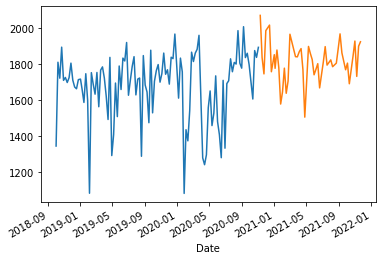

In [23]:
y_train = df_t['TEU'][:int(0.7*len(df_t))]
y_test = df_t['TEU'][int(0.7*len(df_t)):]
y_train.plot()
y_test.plot()

In [25]:
model = pm.auto_arima (y_train, d = 1, m=52, seasonal = True, trace = True)
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[52] intercept   : AIC=inf, Time=10.27 sec
 ARIMA(0,1,0)(0,0,0)[52] intercept   : AIC=1473.420, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[52] intercept   : AIC=1454.081, Time=2.97 sec
 ARIMA(0,1,1)(0,0,1)[52] intercept   : AIC=1443.629, Time=1.40 sec
 ARIMA(0,1,0)(0,0,0)[52]             : AIC=1471.479, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[52] intercept   : AIC=1442.379, Time=0.06 sec
 ARIMA(0,1,1)(1,0,0)[52] intercept   : AIC=1443.663, Time=1.19 sec
 ARIMA(0,1,1)(1,0,1)[52] intercept   : AIC=inf, Time=3.62 sec
 ARIMA(1,1,1)(0,0,0)[52] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,1,2)(0,0,0)[52] intercept   : AIC=1442.150, Time=0.10 sec
 ARIMA(0,1,2)(1,0,0)[52] intercept   : AIC=1443.679, Time=1.77 sec
 ARIMA(0,1,2)(0,0,1)[52] intercept   : AIC=1443.651, Time=1.79 sec
 ARIMA(0,1,2)(1,0,1)[52] intercept   : AIC=inf, Time=4.32 sec
 ARIMA(1,1,2)(0,0,0)[52] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(0,1,3)(0,0,0)[52] intercept   : AIC=

ARIMA(order=(0, 1, 2), scoring_args={}, seasonal_order=(0, 0, 0, 52),
      suppress_warnings=True, with_intercept=False)

In [26]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  109
Model:               SARIMAX(0, 1, 2)   Log Likelihood                -717.191
Date:                Mon, 07 Feb 2022   AIC                           1440.382
Time:                        13:47:15   BIC                           1448.428
Sample:                             0   HQIC                          1443.644
                                - 109                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6778      0.094     -7.187      0.000      -0.863      -0.493
ma.L2         -0.1523      0.098     -1.556      0.120      -0.344       0.040
sigma2      3.375e+04   3590.281      9.399      0.0

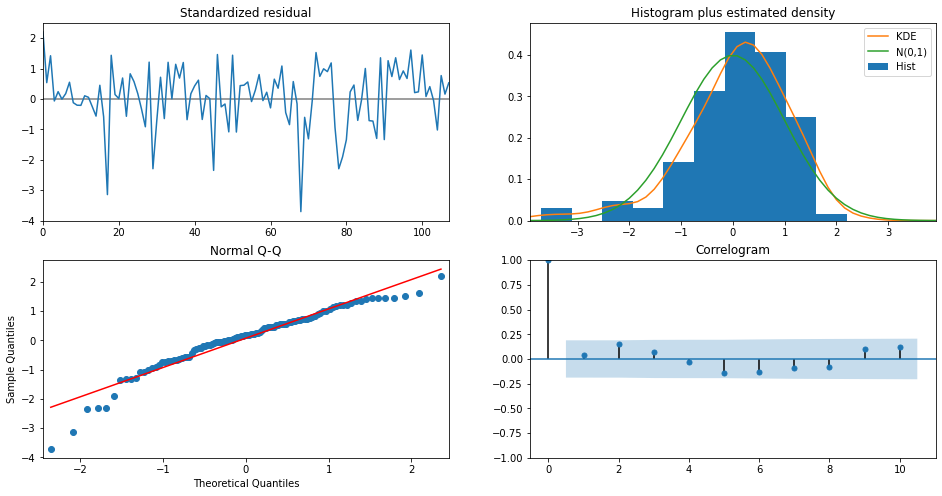

In [27]:
model.plot_diagnostics(figsize=(16, 8))
plt.show()

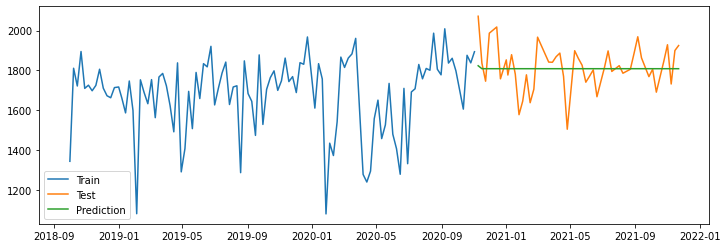

In [28]:
# 테스트 데이터 개수만큼 예측
y_predict = model.predict(n_periods=len(y_test)) 
y_predict = pd.DataFrame(y_predict,index = y_test.index,columns=['Prediction'])

# 그래프
fig, axes = plt.subplots(1, 1, figsize=(12, 4))
plt.plot(y_train, label='Train')        # 훈련 데이터
plt.plot(y_test, label='Test')          # 테스트 데이터
plt.plot(y_predict, label='Prediction')  # 예측 데이터
plt.legend()
plt.show()

In [29]:
def forecast_one_step():
    fc, conf_int = model.predict(n_periods=1 # 한 스텝씩!
        , return_conf_int=True)              # 신뢰구간 출력
    return (
        fc.tolist()[0],
        np.asarray(conf_int).tolist()[0]
    )

In [30]:
forecasts = []
y_pred = []
pred_upper = []
pred_lower = []

for new_ob in y_test:
    fc, conf = forecast_one_step()
    y_pred.append(fc)
    pred_upper.append(conf[1])
    pred_lower.append(conf[0])

    ## 모형 업데이트 !!
    model.update(new_ob)

In [31]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  156
Model:               SARIMAX(0, 1, 2)   Log Likelihood               -1012.221
Date:                Mon, 07 Feb 2022   AIC                           2030.443
Time:                        13:48:16   BIC                           2039.573
Sample:                             0   HQIC                          2034.151
                                - 156                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6785      0.076     -8.977      0.000      -0.827      -0.530
ma.L2         -0.1696      0.077     -2.189      0.029      -0.321      -0.018
sigma2      2.776e+04   2349.374     11.814      0.0

In [32]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = go.Figure([
    # 훈련 데이터-------------------------------------------------------
    go.Scatter(x = y_train.index, y = y_train, name = "Train", mode = 'lines'
              ,line=dict(color = 'royalblue'))
    # 테스트 데이터------------------------------------------------------
    , go.Scatter(x = y_test.index, y = y_test, name = "Test", mode = 'lines'
                ,line = dict(color = 'rgba(0,0,30,0.5)'))
    # 예측값-----------------------------------------------------------
    , go.Scatter(x = y_test.index, y = y_pred, name = "Prediction", mode = 'lines'
                     ,line = dict(color = 'red', dash = 'dot', width=3))
    
    # 신뢰 구간---------------------------------------------------------
    , go.Scatter(x = y_test.index.tolist() + y_test.index[::-1].tolist() 
                ,y = pred_upper + pred_lower[::-1] ## 상위 신뢰 구간 -> 하위 신뢰 구간 역순으로
                ,fill='toself'
                ,fillcolor='rgba(0,0,30,0.1)'
                ,line=dict(color='rgba(0,0,0,0)')
                ,hoverinfo="skip"
                ,showlegend=False)
])

fig.update_layout(height=400, width=1000, title_text="ARIMA()모형")
fig.show()

In [33]:
def MAPE(y_test, y_pred):
	return np.mean(np.abs((y_test - y_pred) / y_test)) * 100 
    
print(f"MAPE: {MAPE(y_test, y_pred):.3f}")

MAPE: 4.772
